In [6]:
import numpy as np
import pandas as pd
import gym
import time 
import os
from gym import spaces
import matplotlib.pyplot as plt
import sys
sys.path.append('../../Linear_simple/')
from agents import QLearning, DQN
from env_variable import RegEnv
from IPython.display import display, clear_output
import torch
import torch.nn as nn

# Training DQN

In [2]:
lr = 0.1
env = RegEnv(lr=lr)
alpha = 0.001
gamma = 0.99
episodes = 30000
batch_size = 128
epsilon = 0.3
decay = True
disc_factor = 0.35
discount = 1-1/(episodes*disc_factor)


def adaptive(self, episode):
    self.epsilon = max(0.01, min(1.0, self.epsilon*discount))
# Adaptive modifica el epsilon creando un decaimiento exponencial del mismo
# desde 1 hasta un mínimo de 0.01, para ver el decaimiento se puede
# representar: plt.plot(range(episodes),discount**np.array(range(episodes)))
# De manera que si el discount factor es mayor, el decaimiento es más suave.
# De esta manera se incentiva la exploración frente a la explotación
# en los primeros episodios.


if decay is True:
    epsilon = 1
    adaptive = adaptive
else:
    adaptive = None
    disc_factor = 0
# Si especifico decay = False, entonces no se utiliza el decaimiento para
# épsilon, y este parámetro queda fijo con el valor que se ponga arriba.

model = DQN(env, alpha, gamma, epsilon, adaptive=adaptive,
            save=f'./weights_{episodes}_{alpha}_{gamma}_\
            {batch_size}_{decay}_{disc_factor}.pt')

In [3]:
stats = model.train(env, episodes, batch_size=batch_size)

de: 29480 Returns: -300329.25
Episode: 29481 Returns: -76417.0
Episode: 29482 Returns: -466439.21875
Episode: 29483 Returns: -228895.203125
Episode: 29484 Returns: -270353.125
Episode: 29485 Returns: -84202.46875
Episode: 29486 Returns: -501815.65625
Episode: 29487 Returns: -526.5155639648438
Episode: 29488 Returns: -94916.4375
Episode: 29489 Returns: -152471.3125
Episode: 29490 Returns: -430386.78125
Episode: 29491 Returns: -85432.28125
Episode: 29492 Returns: -50898.390625
Episode: 29493 Returns: -43503.375
Episode: 29494 Returns: -444864.4375
Episode: 29495 Returns: -1322.373291015625
Episode: 29496 Returns: -52333.59765625
Episode: 29497 Returns: -40462.578125
Episode: 29498 Returns: -222857.875
Episode: 29499 Returns: -344900.40625
Episode: 29500 Returns: -224892.3125
Episode: 29501 Returns: -223427.546875
Episode: 29502 Returns: -323469.59375
Episode: 29503 Returns: -138191.78125
Episode: 29504 Returns: -158859.21875
Episode: 29505 Returns: -533006.6875
Episode: 29506 Returns: -6

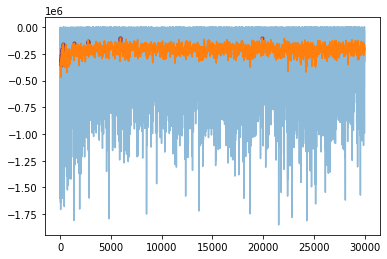

In [7]:
checks = np.array(stats['checkpoints']).astype(int)
rewards = np.array(stats['rewards'])
smooth = pd.DataFrame(rewards).rolling(40).mean()
# Plot de las curvas de entrenamiento.
plt.plot(range(len(rewards)), rewards, alpha=0.5)
plt.plot(range(len(smooth)), smooth)
plt.scatter(checks, smooth.iloc[checks], c='r', marker='.')
plt.show()

# Training Q_Learning

In [8]:
alpha = 0.3
gamma = 0.7
epsilon = 0.15
episodes = 50000
disc_factor = 0.15
discount = 1-1/(episodes*disc_factor)

In [9]:
OBSERVATION_DIMS = env.observation_space.shape[0]
LOWER = env.observation_space.low
HIGHER = env.observation_space.high

RESOLUTIONS = list(((HIGHER-LOWER)/lr).astype('int'))
ALL_POSSIBLE_STATES = np.array(np.meshgrid(
    *[range(res) for res in RESOLUTIONS])).T.reshape(-1, OBSERVATION_DIMS)
STATE_SPACE = {tuple(j): i for i, j in enumerate(ALL_POSSIBLE_STATES)}


def discretize(state):
    for i in range(OBSERVATION_DIMS):
        state[i] = np.digitize(state[i],
                               np.linspace(LOWER[i],
                                           HIGHER[i],
                                           RESOLUTIONS[i]-1))
    return STATE_SPACE[tuple(state.astype(int))]

s: -385004.2578576315
Episode: 49560 ; Returns: -466511.30168790225
Episode: 49561 ; Returns: -12407.229308768518
Episode: 49562 ; Returns: -219780.80625920245
Episode: 49563 ; Returns: -160375.9509229929
Episode: 49564 ; Returns: -386682.0935035251
Episode: 49565 ; Returns: -472413.24591096904
Episode: 49566 ; Returns: -9813.384462475697
Episode: 49567 ; Returns: -210431.81208277016
Episode: 49568 ; Returns: -55267.882754712125
Episode: 49569 ; Returns: -139484.22366117896
Episode: 49570 ; Returns: -363218.6619318808
Episode: 49571 ; Returns: -142272.96133862025
Episode: 49572 ; Returns: -297183.5473583992
Episode: 49573 ; Returns: -180047.04088782985
Episode: 49574 ; Returns: -306138.62163651275
Episode: 49575 ; Returns: -21478.338044791715
Episode: 49576 ; Returns: -193065.09951330782
Episode: 49577 ; Returns: -38662.932922435655
Episode: 49578 ; Returns: -72596.45233638828
Episode: 49579 ; Returns: -417080.15906178684
Episode: 49580 ; Returns: -523047.9498610224
Episode: 49581 ; Re

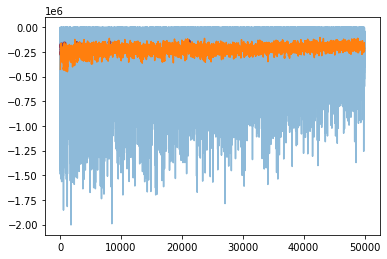

In [10]:
model = QLearning(alpha, gamma, epsilon, adaptive=adaptive,
                  discretize=discretize, double=True, verbose=True,
                  save=f'./weights_{episodes}_{alpha}_\
                  {gamma}_{decay}_{disc_factor}.npy')

stats = model.train(env, episodes)

checks = np.array(stats['checkpoints']).astype(int)
rewards = np.array(stats['rewards'])
smooth = pd.DataFrame(rewards).rolling(40).mean()
# Plot de las curvas de entrenamiento.
plt.plot(range(len(rewards)), rewards, alpha=0.5)
plt.plot(range(len(smooth)), smooth)
plt.scatter(checks, smooth.iloc[checks], c='r', marker='.')
plt.show()